## Exercise-04
## Index No - 190621M
## Name - K. Thanushan

### Question 1.

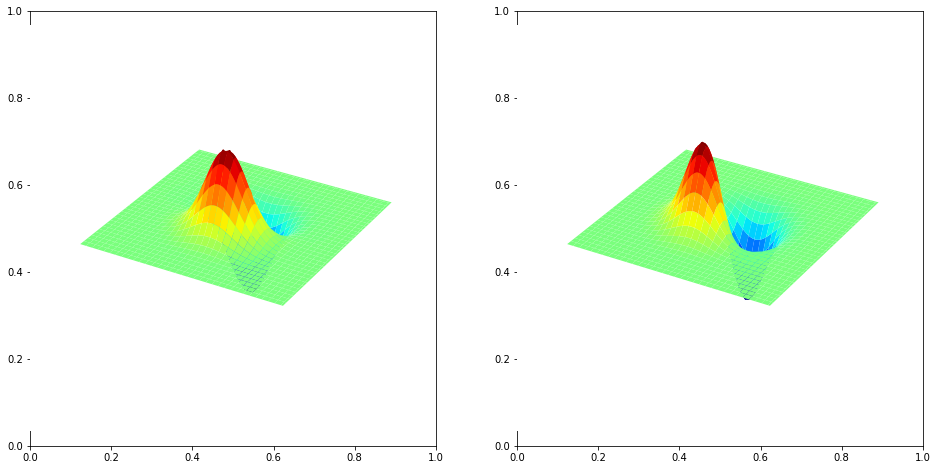

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
ax2 = fig.add_subplot(1,2,2, projection = '3d')

delta = 0.1
XX,YY = np.meshgrid(np.arange(-5, 5 + delta, delta), np.arange(-5, 5 + delta, delta))

sigma = 1
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))
g /= np.sum(g)
sobel_v = np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]], dtype = np.float32)
g_x = cv.filter2D(g, -1, sobel_v)
sobel_h = np.array([[-1, 0, -1], [-2, 0, 2],[1, 0, 1]], dtype = np.float32)
g_y = cv.filter2D(g, -1, sobel_h)


surf1 = ax1.plot_surface(XX, YY, g_x, cmap = cm.jet, linewidth = 0, antialiased = True)
surf2 = ax2.plot_surface(XX, YY, g_y, cmap = cm.jet, linewidth = 0, antialiased = True)
ax1.axis('off')
ax2.axis('off')
plt.show()

### Question 2.

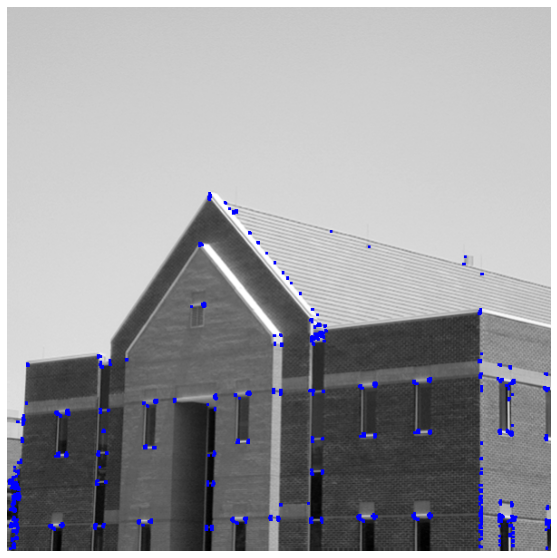

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'building.tif', cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(dst, None)
img[dst > 0.01*dst.max()] = [0, 0, 255]

fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(img)
ax.axis('off')
plt.show()
#cv.imshow('dst', img)
#cv.waitKey(0) 
#cv.destroyAllWindows


### Question 3

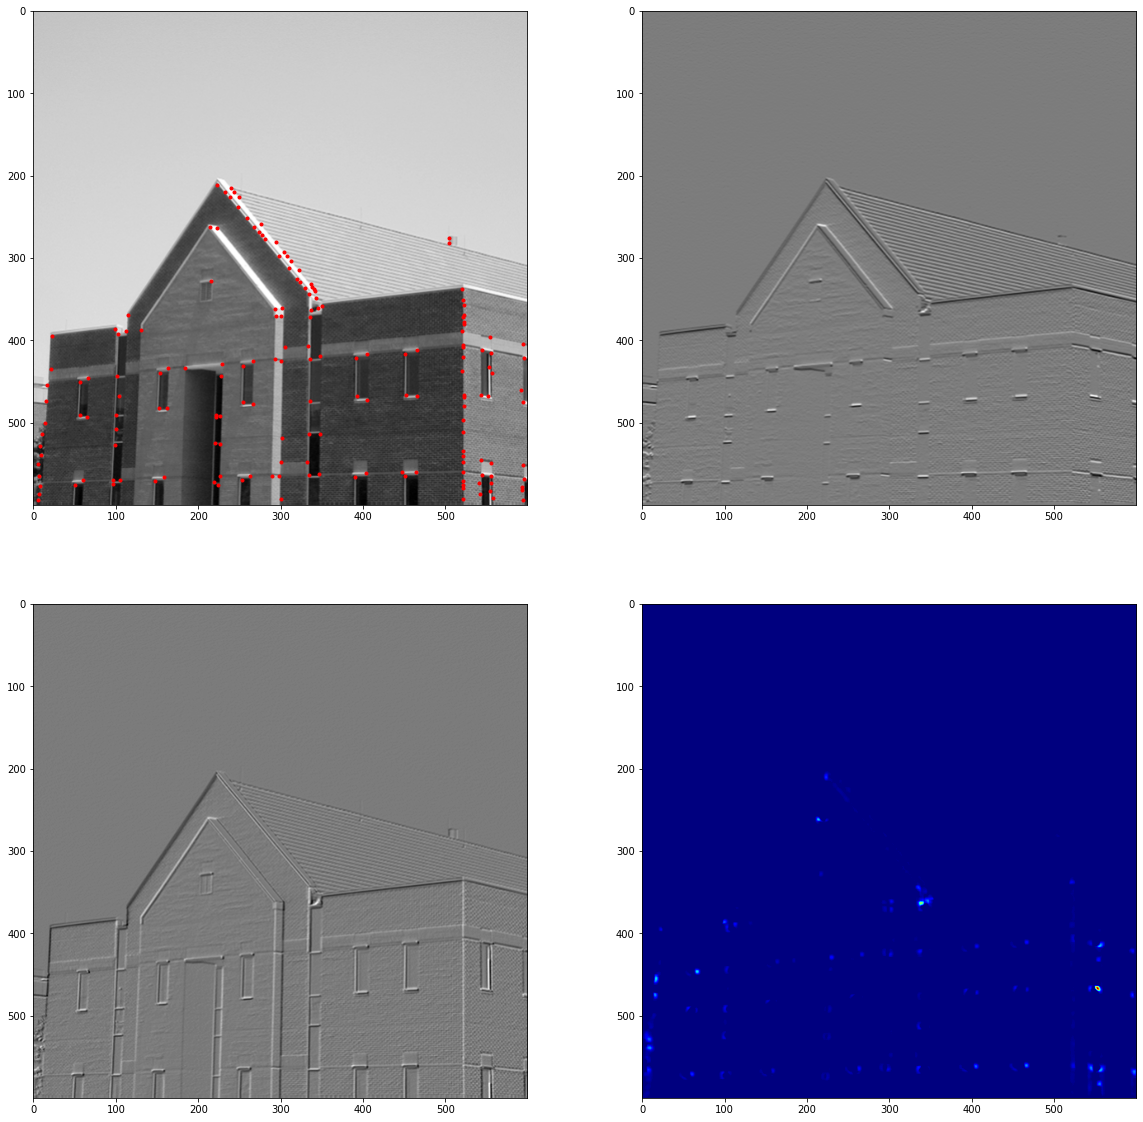

In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from skimage.feature import peak_local_max

img = cv.imread(r'building.tif', cv.IMREAD_COLOR)
assert img is not None

I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
I = np.float32(I)

sobel_v = np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]], dtype = np.float32)
sobel_h = np.array([[-1, 0, -1], [-2, 0, 2],[1, 0, 1]], dtype = np.float32)

Ix = cv.filter2D(I, -1, sobel_v)
Iy = cv.filter2D(I, -1, sobel_h)
ksize = 7
sigma = 3
m11 = cv.GaussianBlur(Ix*Ix, (ksize,ksize), sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize,ksize), sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy, (ksize,ksize), sigma)

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R = det - alpha*trace**2
R[R < 1e7] = 0
coordinates = peak_local_max(R, min_distance = 2)

fig, ax = plt.subplots(2, 2 , figsize = (20,20))
ax[0,0].imshow(img, cmap = 'gray')
ax[0,0].plot(coordinates[:,1], coordinates[:,0], 'r.')
ax[0,1].imshow(Ix + 127, cmap = 'gray')
ax[1,0].imshow(Iy + 127, cmap = 'gray')
ax[1,1].imshow(R + 127, cmap = cm.jet)

### Question 4.

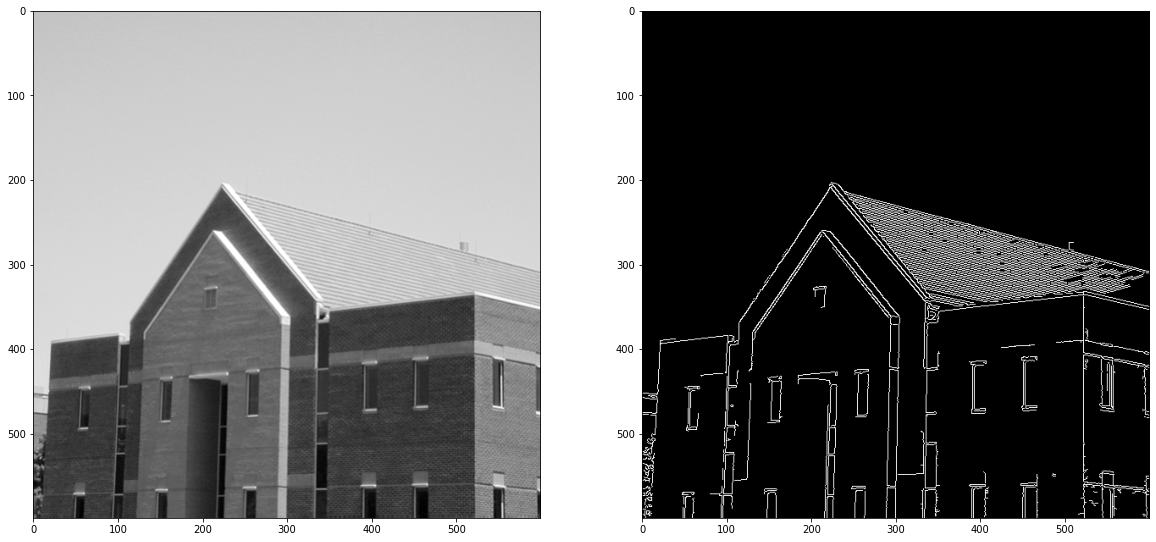

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'building.tif', cv.IMREAD_GRAYSCALE)
assert img is not None

edges = cv.Canny(img, 100,200)

fig, ax = plt.subplots(1, 2 , figsize = (20,20))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(edges, cmap = 'gray')